<a href="https://colab.research.google.com/github/R-Damanhuri/Cocoki-Tweet-Emotion-Analysis-IndoBERT/blob/main/Cocoki_Tweet_Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = "cocoki_raw.csv"

# Specify the path to your CSV file
file_path = filename

# Read the CSV file into a pandas DataFrame
df_raw = pd.read_csv(file_path, delimiter=";")

In [3]:
df_raw.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Jul 30 23:31:49 +0000 2023,1685795359929552897,@4evaway @banjarbase cocoki di shopee,0,1,0,1,in,1261972123712516097,1685668633849286656,kurakuraina,https://twitter.com/kurakuraina/status/1685795...
1,Sun Jul 30 23:30:22 +0000 2023,1685794997755596800,info trik cocoki hari ini,0,1,0,1,in,1214851074609147906,1685794997755596800,xxxx_ayy,https://twitter.com/xxxx_ayy/status/1685794997...
2,Sun Jul 30 23:29:40 +0000 2023,1685794818788851713,main shopee cocoki sampai kebawa mimpi kalau w...,0,1,0,0,in,949055286,1685794818788851713,dnmrven,https://twitter.com/dnmrven/status/16857948187...
3,Sun Jul 30 23:28:59 +0000 2023,1685794647455715328,pagi yang diawali main cocoki 😂,0,1,0,2,in,528015782,1685794647455715328,tidaksukaduren,https://twitter.com/tidaksukaduren/status/1685...
4,Sun Jul 30 23:26:22 +0000 2023,1685793990363516928,@discountfess kalo cocoki hari ini polanya gim...,0,0,0,0,in,1496303206292353031,1685452648785592320,rachaj8sng,https://twitter.com/rachaj8sng/status/16857939...


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           511 non-null    object
 1   id_str               511 non-null    int64 
 2   full_text            511 non-null    object
 3   quote_count          511 non-null    int64 
 4   reply_count          511 non-null    int64 
 5   retweet_count        511 non-null    int64 
 6   favorite_count       511 non-null    int64 
 7   lang                 511 non-null    object
 8   user_id_str          511 non-null    int64 
 9   conversation_id_str  511 non-null    int64 
 10  username             511 non-null    object
 11  tweet_url            511 non-null    object
dtypes: int64(7), object(5)
memory usage: 48.0+ KB


In [5]:
df_raw.shape

(511, 12)

In [6]:
df_selected = df_raw[['created_at','full_text','quote_count','reply_count','retweet_count','favorite_count']]

In [7]:
df_selected.head()

,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count
0,Sun Jul 30 23:31:49 +0000 2023,@4evaway @banjarbase cocoki di shopee,0,1,0,1
1,Sun Jul 30 23:30:22 +0000 2023,info trik cocoki hari ini,0,1,0,1
2,Sun Jul 30 23:29:40 +0000 2023,main shopee cocoki sampai kebawa mimpi kalau w...,0,1,0,0
3,Sun Jul 30 23:28:59 +0000 2023,pagi yang diawali main cocoki 😂,0,1,0,2
4,Sun Jul 30 23:26:22 +0000 2023,@discountfess kalo cocoki hari ini polanya gim...,0,0,0,0


This dataset will be use as Test Data only.

# Data Cleaning

In [8]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
sastrawi_sw = stop_factory.get_stop_words()

In [11]:
from nltk.corpus import stopwords

In [12]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F999" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [13]:
import string
def preprocess(text):
    text = str(text)
    text = remove_emoji(text)

    # remove numbers
    text = ''.join(word for word in text if not word.isdigit())

    #remove html special characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)','',text)
    text = re.sub('<.*?>', '', text)
    temp_text = list(text)
    for i in range(len(temp_text)):
      if temp_text[i] in string.punctuation:
        temp_text[i] = " "
    text = ''.join(temp_text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub("\n"," ",text)
    text = text.lower()
    text = re.sub("(username|user|url|rt|xf|fx|xe|xa)\s|\s(user|url|rt|xf|fx|xe|xa)","",text)
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)
    text = re.sub(r"\b[a-zA-Z]\b","",text)
    text = re.sub('(s{2,})',' ',text)
    text = text.lower()

    # tokenization
    tokens = nltk.word_tokenize(text)

    for i, token in enumerate(tokens):
      if token in dict_kamus_alay1:
        tokens[i] = dict_kamus_alay1[token]
      if token in dict_kamus_alay2:
        tokens[i] = dict_kamus_alay2[token]

    # remove extra whitespace
    text = ' '.join(tokens)
    text = ' '.join(text.split())

    return text

In [14]:
kamus_alay1 = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/Kamus-Alay/main/Kamus-Alay.csv')
dict_kamus_alay1 = {}
for _,row in kamus_alay1.iterrows():
    if row["kataBaik"] is np.NaN:
        continue
    dict_kamus_alay1[row["kataAlay"]] = row["kataBaik"]

In [15]:
kamus_alay2 = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
kamus_alay2 = kamus_alay2.filter(['slang', 'formal'], axis=1)
kamus_alay2 = kamus_alay2.drop_duplicates(subset=['slang'], keep='first')
dict_kamus_alay2 = {}
for _,row in kamus_alay2.iterrows():
    if row["formal"] is np.NaN:
        continue
    dict_kamus_alay2[row["slang"]] = row["formal"]

In [16]:
df_cleaned = df_selected.copy()

In [17]:
df_cleaned['text_cleaned'] = df_cleaned['full_text'].apply(preprocess)

In [18]:
freq_word = pd.DataFrame()
freq_word['word'] = df_cleaned['text_cleaned'].str.split().explode().value_counts().index
freq_word['count'] = df_cleaned['text_cleaned'].str.split().explode().value_counts().values

In [19]:
not_stop_words = ~freq_word['word'].isin(sastrawi_sw) & ~freq_word['word'].isin(stopwords.words('indonesian'))

In [20]:
freq_word[not_stop_words][:75]

,word,count
0,cocoki,522
1,main,231
2,menang,150
3,shopee,148
9,banget,66
...,...,...
142,shopi,5
144,sibuk,5
145,sakit,5
147,mimpi,5


In [21]:
freq_word[not_stop_words][:75]['word'].tolist()

['cocoki',
 'main',
 'menang',
 'shopee',
 'banget',
 'permainan',
 'gue',
 'anjing',
 'sih',
 'iya',
 'stre',
 'sopi',
 'deh',
 'jam',
 'orang',
 'tidur',
 'stres',
 'susah',
 'kak',
 'nya',
 'emosi',
 'habis',
 'level',
 'joki',
 'kemarin',
 'pengin',
 'segini',
 'allah',
 'muak',
 'menangin',
 'kesal',
 'gara',
 'pusing',
 'alias',
 'syopi',
 'gampang',
 'koin',
 'gara-gara',
 'wkwk',
 'sumpah',
 'tips',
 'buka',
 'nyerah',
 'kalah',
 'lihat',
 'ku',
 'jancok',
 'kali',
 'tahi',
 'informasi',
 'hidup',
 'coba',
 'pagi',
 'eh',
 'asu',
 'plis',
 'benaran',
 'doang',
 'mencoba',
 'gila',
 'malam',
 'kasih',
 'penasaran',
 'bangun',
 'anjeng',
 'harga',
 'pas',
 'besok',
 'langsung',
 'pamer',
 'shopi',
 'sibuk',
 'sakit',
 'mimpi',
 'trik']

In [22]:
more_stopwords = ['cocoki',
 'shopee',
 'banget',
 'gue',
 'sih',
 'iya',
 'sopi',
 'deh',
 'kak',
 'nya',
 'habis',
 'pengin',
 'segini',
 'allah',
 'alias',
 'syopi',
 'wkwk',
 'sumpah',
 'ku',
 'jancok',
 'kali',
 'eh',
 'plis',
 'benaran',
 'doang',
 'pas',
 'besok',
 'shopi']

In [23]:
def stopword_removal(text):
  # tokenization
  tokens = nltk.word_tokenize(text)
  # remove stopwords and additional stopwords
  stop_words = set(sastrawi_sw + stopwords.words('indonesian') + more_stopwords)
  filtered_tokens = [word for word in tokens if word not in stop_words]
  # remove extra whitespace
  text = ' '.join(filtered_tokens)
  text = ' '.join(text.split())
  return text

In [24]:
df_cleaned['text_cleaned'] = df_cleaned['text_cleaned'].apply(stopword_removal)

In [25]:
df_cleaned[['full_text','text_cleaned']]

,full_text,text_cleaned
0,@4evaway @banjarbase cocoki di shopee,
1,info trik cocoki hari ini,informasi trik
2,main shopee cocoki sampai kebawa mimpi kalau w...,main terbawa mimpi menang
3,pagi yang diawali main cocoki 😂,pagi diawali main
4,@discountfess kalo cocoki hari ini polanya gim...,polanya guys
...,...,...
506,AKU HAMPIR MENANG GAME SHOPEE COCOKI ANJIRRR🅰️...,menang permainan frustasi mainin
507,"@convomfs Ngha, shopee cocoki ku udah coba ber...",ngha coba berpuluh puluh gahal
508,main shopee cocoki sampe eneg anjr,main eneg anjr
509,saya putuskan untuk pensiun sementara dari sho...,putuskan pensiun lose streak


In [26]:
df_cleaned.to_csv('cocoki_cleaned.csv', index=False, encoding="", na_rep="")

# Data Labeling

In [27]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.0 MB/s eta 0:00:00


## IndoBERT Model

In [28]:
#Clone repositori berisi dataset dan model indobenchmark untuk proses NLP
!git clone https://github.com/indobenchmark/indonlu.git

Cloning into 'indonlu'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 500 (delta 115), reused 139 (delta 110), pack-reused 316
Receiving objects: 100% (500/500), 9.45 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [29]:
import random
import numpy as np
import torch
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
from nltk.tokenize import TweetTokenizer

from indonlu.utils.forward_fn import forward_sequence_classification
from indonlu.utils.metrics import document_sentiment_metrics_fn
from indonlu.utils.data_utils import EmotionDetectionDataset, EmotionDetectionDataLoader

In [30]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

In [31]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = EmotionDetectionDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
df_model = pd.read_csv("cocoki_cleaned.csv", usecols=['text_cleaned'])

In [33]:
df_model = df_model.dropna()

In [34]:
df_model.shape

(495, 1)

In [35]:
df_model['label'] = "anger"

In [36]:
df_model.head()

,text_cleaned,label
1,informasi trik,anger
2,main terbawa mimpi menang,anger
3,pagi diawali main,anger
4,polanya guys,anger
5,sarapan,anger


In [37]:
df_model = df_model.rename(columns={'text_cleaned':'tweet'})
df_model = df_model.reindex(columns=['label','tweet'])

In [38]:
df_model.head()

,label,tweet
1,anger,informasi trik
2,anger,main terbawa mimpi menang
3,anger,pagi diawali main
4,anger,polanya guys
5,anger,sarapan


In [39]:
df_model.to_csv("cocoki_test.csv")

In [40]:
train_dataset_path = './indonlu/dataset/emot_emotion-twitter/train_preprocess.csv'
valid_dataset_path = './indonlu/dataset/emot_emotion-twitter/valid_preprocess.csv'
test_dataset_path = 'cocoki_test.csv'
train_dataset = EmotionDetectionDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = EmotionDetectionDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = EmotionDetectionDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = EmotionDetectionDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=True)
valid_loader = EmotionDetectionDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=False)
test_loader = EmotionDetectionDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=2, shuffle=False)
w2i, i2w = EmotionDetectionDataset.LABEL2INDEX, EmotionDetectionDataset.INDEX2LABEL

print(w2i)
print(i2w)

{'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4}
{0: 'sadness', 1: 'anger', 2: 'love', 3: 'fear', 4: 'happy'}


In [41]:
optimizer = optim.Adam(model.parameters(), lr=7e-5)
model = model.cuda()

In [42]:
train_losses = []
train_metrics = []
valid_losses = []
valid_metrics = []

# Train
n_epochs = 5
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    # Calculate train metric
    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    train_metrics.append(metrics)
    train_losses.append(total_train_loss / (i + 1))
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # Evaluate on validation
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Calculate total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Calculate evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    valid_metrics.append(metrics)
    valid_losses.append(total_loss / (i + 1))
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

(Epoch 1) TRAIN LOSS:0.9962 LR:0.00007000: 100%|██████████| 111/111 [00:43<00:00,  2.53it/s]


(Epoch 1) TRAIN LOSS:0.9962 ACC:0.61 F1:0.61 REC:0.60 PRE:0.62 LR:0.00007000


VALID LOSS:0.9236 ACC:0.68 F1:0.66 REC:0.69 PRE:0.71: 100%|██████████| 14/14 [00:01<00:00,  7.45it/s]


(Epoch 1) VALID LOSS:0.9236 ACC:0.68 F1:0.66 REC:0.69 PRE:0.71


(Epoch 2) TRAIN LOSS:0.5544 LR:0.00007000: 100%|██████████| 111/111 [00:42<00:00,  2.59it/s]


(Epoch 2) TRAIN LOSS:0.5544 ACC:0.81 F1:0.81 REC:0.81 PRE:0.82 LR:0.00007000


VALID LOSS:0.8705 ACC:0.71 F1:0.71 REC:0.71 PRE:0.71: 100%|██████████| 14/14 [00:02<00:00,  6.87it/s]


(Epoch 2) VALID LOSS:0.8705 ACC:0.71 F1:0.71 REC:0.71 PRE:0.71


(Epoch 3) TRAIN LOSS:0.2506 LR:0.00007000: 100%|██████████| 111/111 [00:44<00:00,  2.47it/s]


(Epoch 3) TRAIN LOSS:0.2506 ACC:0.92 F1:0.92 REC:0.92 PRE:0.92 LR:0.00007000


VALID LOSS:1.0447 ACC:0.70 F1:0.70 REC:0.70 PRE:0.71: 100%|██████████| 14/14 [00:02<00:00,  6.83it/s]


(Epoch 3) VALID LOSS:1.0447 ACC:0.70 F1:0.70 REC:0.70 PRE:0.71


(Epoch 4) TRAIN LOSS:0.1534 LR:0.00007000: 100%|██████████| 111/111 [00:44<00:00,  2.51it/s]


(Epoch 4) TRAIN LOSS:0.1534 ACC:0.95 F1:0.95 REC:0.95 PRE:0.95 LR:0.00007000


VALID LOSS:1.3368 ACC:0.69 F1:0.68 REC:0.69 PRE:0.72: 100%|██████████| 14/14 [00:02<00:00,  6.60it/s]


(Epoch 4) VALID LOSS:1.3368 ACC:0.69 F1:0.68 REC:0.69 PRE:0.72


(Epoch 5) TRAIN LOSS:0.1246 LR:0.00007000: 100%|██████████| 111/111 [00:44<00:00,  2.51it/s]


(Epoch 5) TRAIN LOSS:0.1246 ACC:0.96 F1:0.96 REC:0.96 PRE:0.96 LR:0.00007000


VALID LOSS:1.3588 ACC:0.68 F1:0.69 REC:0.69 PRE:0.70: 100%|██████████| 14/14 [00:01<00:00,  7.06it/s]

(Epoch 5) VALID LOSS:1.3588 ACC:0.68 F1:0.69 REC:0.69 PRE:0.70


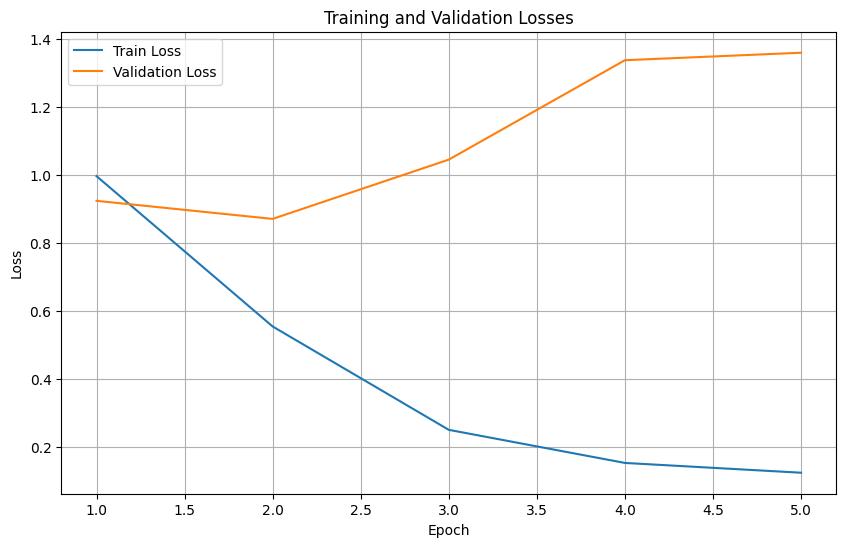

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

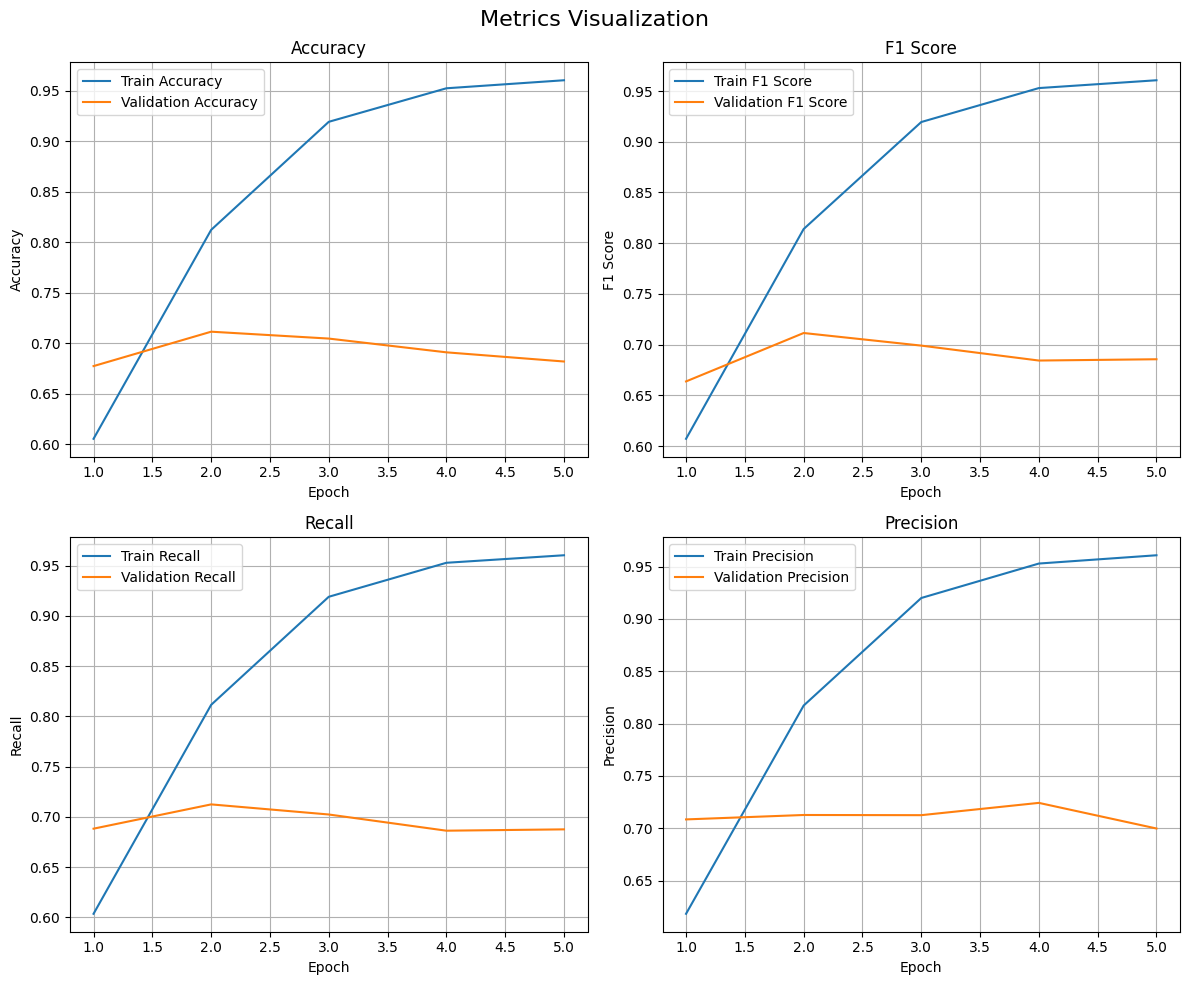

In [44]:
# Function to extract a specific metric from a list of dictionaries
def extract_metric(metrics_list, key):
    return [metrics[key] for metrics in metrics_list]

# Extract metrics for each epoch
train_acc = extract_metric(train_metrics, 'ACC')
train_f1 = extract_metric(train_metrics, 'F1')
train_rec = extract_metric(train_metrics, 'REC')
train_pre = extract_metric(train_metrics, 'PRE')

valid_acc = extract_metric(valid_metrics, 'ACC')
valid_f1 = extract_metric(valid_metrics, 'F1')
valid_rec = extract_metric(valid_metrics, 'REC')
valid_pre = extract_metric(valid_metrics, 'PRE')

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Metrics Visualization', fontsize=16)

# Plot training and validation accuracy
axes[0, 0].plot(range(1, n_epochs + 1), train_acc, label='Train Accuracy')
axes[0, 0].plot(range(1, n_epochs + 1), valid_acc, label='Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot training and validation F1 score
axes[0, 1].plot(range(1, n_epochs + 1), train_f1, label='Train F1 Score')
axes[0, 1].plot(range(1, n_epochs + 1), valid_f1, label='Validation F1 Score')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].set_title('F1 Score')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot training and validation recall
axes[1, 0].plot(range(1, n_epochs + 1), train_rec, label='Train Recall')
axes[1, 0].plot(range(1, n_epochs + 1), valid_rec, label='Validation Recall')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot training and validation precision
axes[1, 1].plot(range(1, n_epochs + 1), train_pre, label='Train Precision')
axes[1, 1].plot(range(1, n_epochs + 1), valid_pre, label='Validation Precision')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [45]:
# Evaluate on test
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp

# Save prediction
df_pred = pd.DataFrame({'label':list_hyp}).reset_index()

100%|██████████| 16/16 [00:00<00:00, 19.85it/s]


In [46]:
df_pred

,index,label
0,0,happy
1,1,love
2,2,sadness
3,3,sadness
4,4,happy
...,...,...
490,490,sadness
491,491,anger
492,492,anger
493,493,sadness


# Exploratory Data Analysis

In [47]:
import seaborn as sns

In [48]:
df_explored = pd.read_csv('cocoki_cleaned.csv')

In [49]:
df_explored['label'] = df_pred['label']

Panjang dan jumlah kata tweet raw

In [50]:
df_explored['tweet_len'] = df_explored['full_text'].astype(str).apply(len)
df_explored['word_count'] = df_explored['full_text'].apply(lambda x: len(str(x).split()))

In [51]:
df_explored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      511 non-null    object
 1   full_text       511 non-null    object
 2   quote_count     511 non-null    int64 
 3   reply_count     511 non-null    int64 
 4   retweet_count   511 non-null    int64 
 5   favorite_count  511 non-null    int64 
 6   text_cleaned    495 non-null    object
 7   label           495 non-null    object
 8   tweet_len       511 non-null    int64 
 9   word_count      511 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 40.0+ KB


In [52]:
df_explored['text_cleaned'].isna().value_counts()

False    495
True      16
Name: text_cleaned, dtype: int64

In [53]:
df_explored = df_explored.dropna()

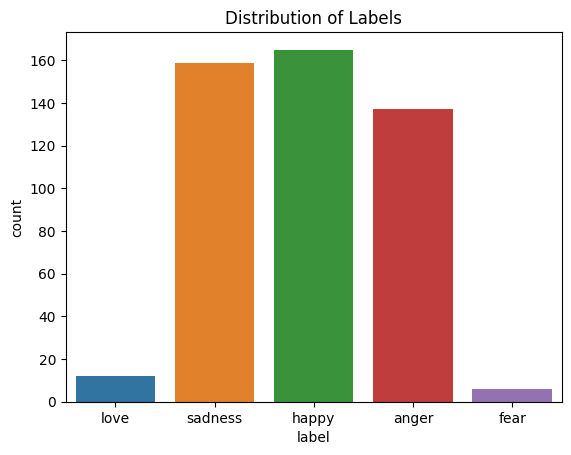

In [54]:
sns.countplot(data=df_explored, x='label')
plt.title('Distribution of Labels')
plt.show()

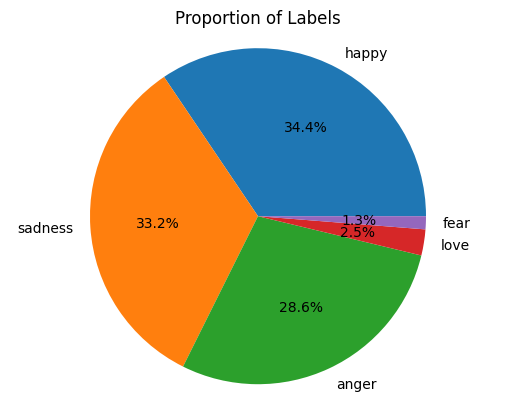

In [55]:
label_counts = df_explored['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Proportion of Labels')
plt.axis('equal')
plt.show()

array([[<Axes: title={'center': 'quote_count'}>,
        <Axes: title={'center': 'reply_count'}>],
       [<Axes: title={'center': 'retweet_count'}>,
        <Axes: title={'center': 'favorite_count'}>],
       [<Axes: title={'center': 'tweet_len'}>,
        <Axes: title={'center': 'word_count'}>]], dtype=object)

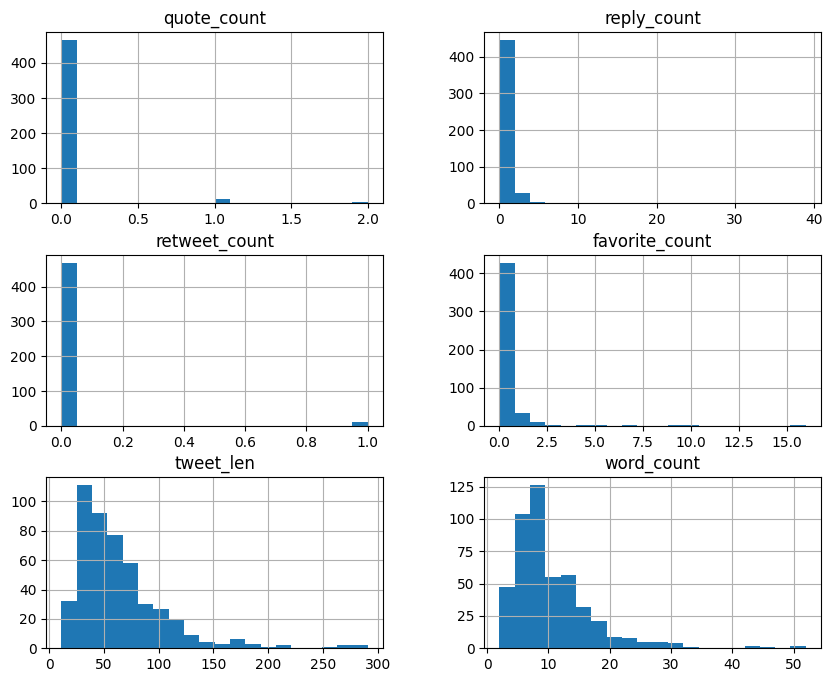

In [56]:
df_explored.hist(bins=20, figsize=(10, 8))

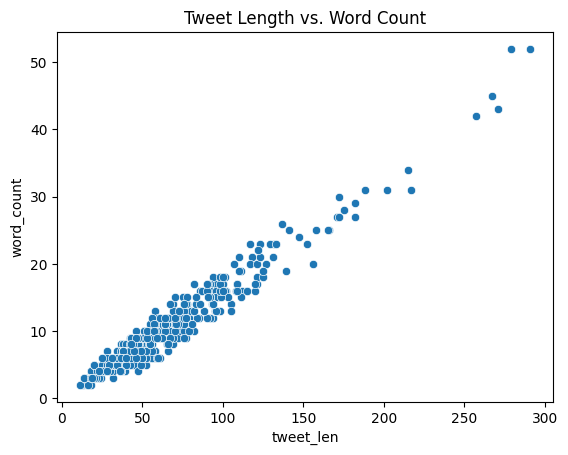

In [57]:
sns.scatterplot(data=df_explored, x='tweet_len', y='word_count')
plt.title('Tweet Length vs. Word Count')
plt.show()

In [58]:
df_explored['created_at']

1      Sun Jul 30 23:30:22 +0000 2023
2      Sun Jul 30 23:29:40 +0000 2023
3      Sun Jul 30 23:28:59 +0000 2023
4      Sun Jul 30 23:26:22 +0000 2023
5      Sun Jul 30 23:24:40 +0000 2023
                    ...              
490    Sun Jul 30 15:05:13 +0000 2023
491    Sun Jul 30 15:04:36 +0000 2023
492    Sun Jul 30 15:04:32 +0000 2023
493    Sun Jul 30 15:04:28 +0000 2023
494    Sun Jul 30 15:04:23 +0000 2023
Name: created_at, Length: 479, dtype: object

In [59]:
df_explored['created_at'] = pd.to_datetime(df_explored['created_at'])
df_explored.set_index('created_at', inplace=True)  # Set 'created_at' as the index

In [60]:
df_explored.index.day.unique()

Int64Index([30], dtype='int64', name='created_at')

In [61]:
df_explored.index.hour.unique()

Int64Index([23, 22, 20, 19, 18, 17, 16, 15], dtype='int64', name='created_at')

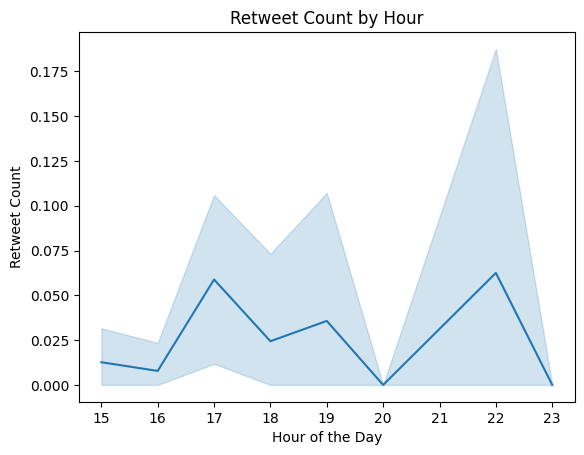

In [62]:
df_explored['hour'] = df_explored.index.hour
sns.lineplot(data=df_explored, x='hour', y='retweet_count')
plt.title('Retweet Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Retweet Count')
plt.show()

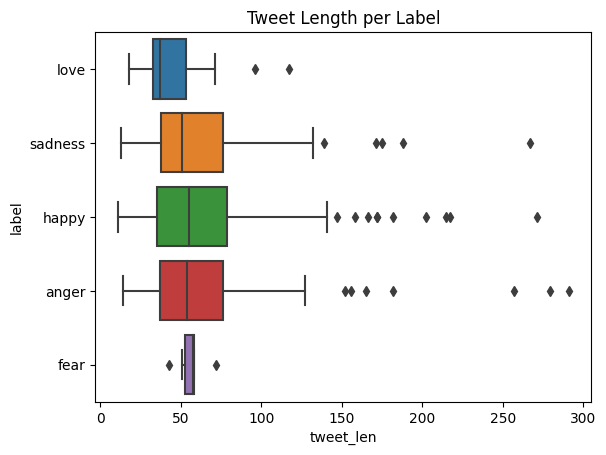

In [63]:
sns.boxplot(df_explored, x="tweet_len", y="label")
plt.title('Tweet Length per Label')
plt.show()

In [64]:
all_word = df_explored['text_cleaned'].str.split().explode().value_counts().index
all_word_freq = df_explored['text_cleaned'].str.split().explode().value_counts().values

<Axes: >

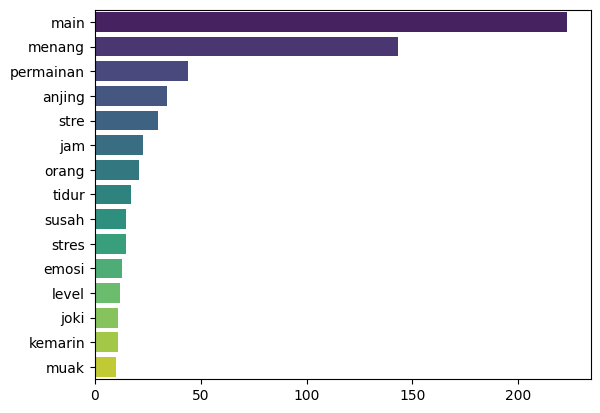

In [65]:
sns.barplot(y=all_word[:15], x=all_word_freq[:15], palette = "viridis")

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [67]:
all_bigram = get_top_n_bigram(df_explored['text_cleaned'], 20)
df_all_bigram = pd.DataFrame(all_bigram, columns=['Tweet', "Count"])

<Axes: xlabel='Count', ylabel='Tweet'>

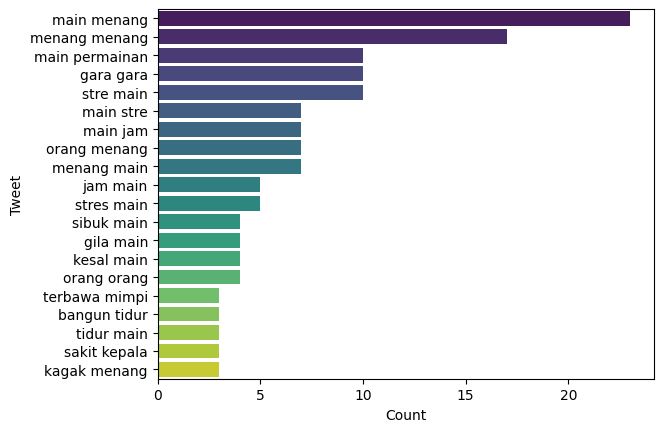

In [68]:
sns.barplot(y=df_all_bigram['Tweet'], x=df_all_bigram['Count'], palette = "viridis")

In [69]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [70]:
all_trigram = get_top_n_trigram(df_explored['text_cleaned'], 20)
df_all_trigram = pd.DataFrame(all_trigram, columns=['Tweet', "Count"])

<Axes: xlabel='Count', ylabel='Tweet'>

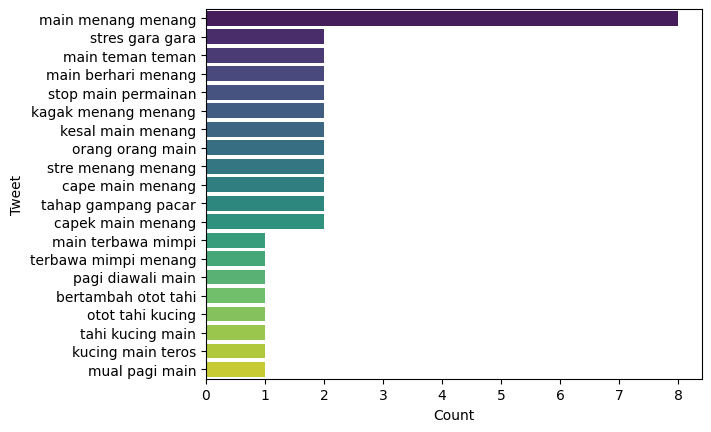

In [71]:
sns.barplot(y=df_all_trigram['Tweet'], x=df_all_trigram['Count'], palette = "viridis")